# <span style="color:blue">Controle de Ventilador</span>

#### Este notebook é destinado a demonstrar  como determinar a velocidade de um ventilador com base na temperatura e da umidade na localidade do computador que processa os scripts.

#### O sistema obtém a temperatura e a umidade a partir da longitude e da latitude do computador. Com isso, através da Lógica Fuzzy, a velocidade do ventilador será definida para o clima obtido na internet.


<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importação das bibliotecas</h2>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import requests
import geocoder
import warnings

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Condições Iniciais</h2>
</div>

In [2]:
%matplotlib inline

warnings.filterwarnings('ignore')

path_saida = 'saida/'

plot_fuzzy_set = True

print_fuzzy_set = True

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Configuração dos Antecedentes</h2>
</div>

In [3]:
# Definições de funções de pertinência de três faixas diferentes de temperaturas.
temperatura = ctrl.Antecedent(np.arange(6, 51.5, 0.5), 'F_TEMP')
temperatura['Baixa'] = fuzz.gaussmf(temperatura.universe, mean=6, sigma=5.0)
temperatura['Media'] = fuzz.gaussmf(temperatura.universe, mean=25, sigma=1.5)
temperatura['Alta'] = fuzz.gaussmf(temperatura.universe, mean=51, sigma=7.0)

In [4]:
if print_fuzzy_set:
    print(temperatura.universe)
    print('Temperatura baixa')
    print(temperatura['Baixa'].mf)
    print('Temperatura média')
    print(temperatura['Media'].mf)
    print('Temperatura alta')
    print(temperatura['Alta'].mf)   

[ 6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5
 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5
 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5
 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5
 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5
 41.  41.5 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5
 48.  48.5 49.  49.5 50.  50.5 51. ]
Temperatura baixa
[1.00000000e+00 9.95012479e-01 9.80198673e-01 9.55997482e-01
 9.23116346e-01 8.82496903e-01 8.35270211e-01 7.82704538e-01
 7.26149037e-01 6.66976811e-01 6.06530660e-01 5.46074427e-01
 4.86752256e-01 4.29557358e-01 3.75311099e-01 3.24652467e-01
 2.78037300e-01 2.35746077e-01 1.97898699e-01 1.64474457e-01
 1.35335283e-01 1.10250525e-01 8.89216175e-02 7.10053537e-02
 5.61347628e-02 4.39369336e-02 3.40474547e-02 2.61214099e-02
 1.98410947e-02 1.49207861e-02 1.11089965e-02 8.18870101e-03
 5.97602290e-03 4.31784001e-03 

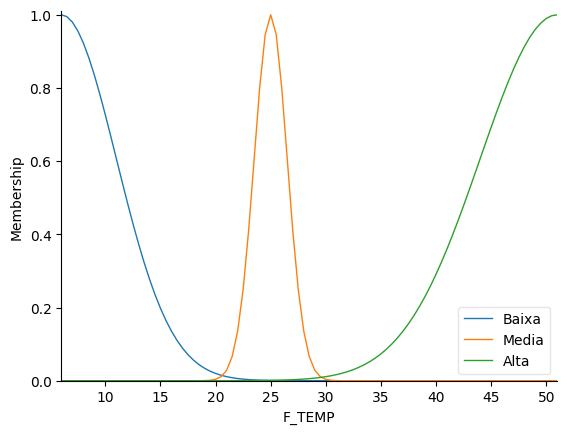

In [5]:
if plot_fuzzy_set:
    temperatura.view()

In [6]:
# Definições de funções de adesão de três faixas diferentes de umidade.
umidade = ctrl.Antecedent(np.arange(11, 93.5, 0.5), 'F_UMID')
umidade['Baixa'] = fuzz.gaussmf(umidade.universe, mean=11, sigma=8)
umidade['Media'] = fuzz.gaussmf(umidade.universe, mean=50, sigma=8)
umidade['Alta'] = fuzz.gaussmf(umidade.universe, mean=93, sigma=8)

In [7]:
if print_fuzzy_set:
    print(umidade.universe)
    print('Umidade baixa')
    print(umidade['Baixa'].mf)
    print('Umidade média')
    print(umidade['Media'].mf)
    print('Umidade alta')
    print(umidade['Alta'].mf)   

[11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5
 18.  18.5 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5
 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5
 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5
 39.  39.5 40.  40.5 41.  41.5 42.  42.5 43.  43.5 44.  44.5 45.  45.5
 46.  46.5 47.  47.5 48.  48.5 49.  49.5 50.  50.5 51.  51.5 52.  52.5
 53.  53.5 54.  54.5 55.  55.5 56.  56.5 57.  57.5 58.  58.5 59.  59.5
 60.  60.5 61.  61.5 62.  62.5 63.  63.5 64.  64.5 65.  65.5 66.  66.5
 67.  67.5 68.  68.5 69.  69.5 70.  70.5 71.  71.5 72.  72.5 73.  73.5
 74.  74.5 75.  75.5 76.  76.5 77.  77.5 78.  78.5 79.  79.5 80.  80.5
 81.  81.5 82.  82.5 83.  83.5 84.  84.5 85.  85.5 86.  86.5 87.  87.5
 88.  88.5 89.  89.5 90.  90.5 91.  91.5 92.  92.5 93. ]
Umidade baixa
[1.00000000e+00 9.98048781e-01 9.92217938e-01 9.82575469e-01
 9.69233234e-01 9.52344800e-01 9.32102492e-01 9.08733756e-01
 8.82496903e-01 8.53676361

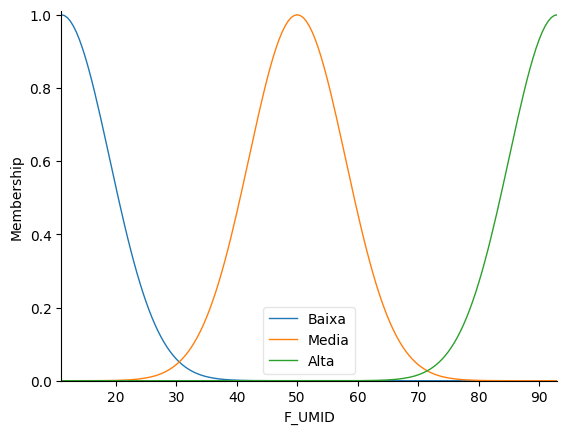

In [8]:
if plot_fuzzy_set:
    umidade.view()

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Configeração dos Consequentes</h2>
</div>

In [9]:
velocidade = ctrl.Consequent(np.arange(0, 4.02, 0.02), 'F_VELOC')
velocidade['Parado'] = fuzz.trapmf(velocidade.universe, [0, 0, 0.3, 0.5])
velocidade['Baixa'] = fuzz.trapmf(velocidade.universe, [0.3, 0.5, 0.8, 1])
velocidade['Media'] = fuzz.trapmf(velocidade.universe, [0.8, 1.1, 1.6, 2.0])
velocidade['Alta'] = fuzz.trapmf(velocidade.universe, [1.8, 2.3, 2.8, 3.2])
velocidade['Muito_Alta'] = fuzz.trapmf(velocidade.universe, [3.0, 3.5, 4.0, 4.0])

In [10]:
if print_fuzzy_set:
    print(velocidade.universe)
    print('Velocidade parado')
    print(velocidade['Parado'].mf)
    print('Velocidade baixa')
    print(velocidade['Baixa'].mf)
    print('Velocidade média')
    print(velocidade['Media'].mf)
    print('Velocidade alta')
    print(velocidade['Alta'].mf)   
    print('Velocidade muito alta')
    print(velocidade['Muito_Alta'].mf)   

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22
 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5
 2.52 2.54 2.56 2.58 2.6  2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78
 2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06
 3.08 3.1  3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34
 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62
 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 3.9
 3.92 3.9

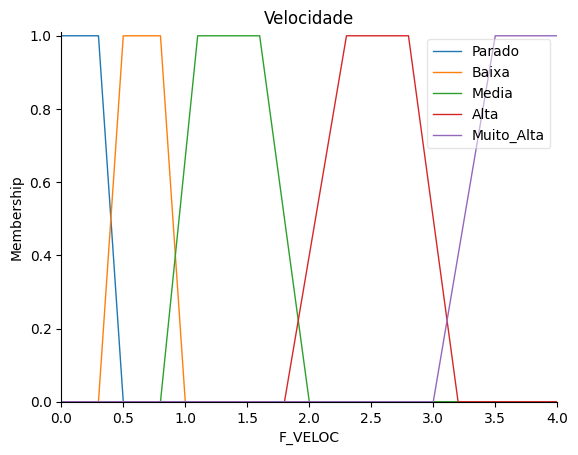

In [11]:
if plot_fuzzy_set:
    velocidade.view()
    plt.title('Velocidade')
    plt.savefig(path_saida + 'velocidade-Consequente')

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Definação das Regras</h2>
</div>

In [12]:
# Regra 1: Temperatura Baixa -> Ventilador Parado.
regra1 = ctrl.Rule(temperatura['Baixa'], velocidade['Parado'])

# Regra 2: Temperatura Média e Umidade Baixa -> Velocidade Baixa.
regra2 = ctrl.Rule(temperatura['Media'] & umidade['Baixa'], velocidade['Baixa'])

# Regra 3: Temperatura Média e Umidade Média  -> Velocidade Média.
regra3 = ctrl.Rule(temperatura['Media'] & umidade['Media'], velocidade['Media'])

# Regra 4: Temperatura Média   e Umidade Alta -> Velocidade Alta.
regra4 = ctrl.Rule(temperatura['Media'] & umidade['Alta'], velocidade['Alta'])

# Regra 5: Temperatura Alta e Umidade Baixa -> Velocidade Média.
regra5 = ctrl.Rule(temperatura['Alta'] & umidade['Baixa'], velocidade['Media'])

# Regra 6: Temperatura Alta e Umidade Média -> Velocidade Alta
regra6 = ctrl.Rule(temperatura['Alta'] & umidade['Media'], velocidade['Alta'])

# Regra 7: Temperatura Alta e Umidade Alta -> Velocidade Muito Alto.
regra7 = ctrl.Rule(temperatura['Alta'] & umidade['Alta'], velocidade['Muito_Alta'])

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Configuração do Controle de Sistema</h2>
</div>

In [13]:
velocidade_ventilador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7])
velocidade_ventilador = ctrl.ControlSystemSimulation(velocidade_ventilador_ctrl)

<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Funções de Apoio</h2>
</div>

In [14]:
def obtem_velocidade(ponto_temperatura, ponto_umidade):
    # Estima a velocidade em relação a tempertatura e a umidade.
    velocidade_ventilador.input['F_TEMP'] = ponto_temperatura
    velocidade_ventilador.input['F_UMID'] = ponto_umidade
    velocidade_ventilador.compute()
    return velocidade_ventilador.output['F_VELOC']


In [15]:
def plot_result(ponto_temperatura, ponto_umidade, velocidade_estimada):
    # Mostra o resultado gráfico de resultado da velocidade em relação a tempertatura e a umidade.
    velocidade.view(sim=velocidade_ventilador)
    plt.suptitle(f'Temperatura:{round(ponto_temperatura, 2)} - Umidade:{round(ponto_umidade, 2)} - Velocidade:{round(velocidade_estimada, 2)}')
    plt.xlabel('Velocidade')
    plt.show()
    return


In [16]:
def obtem_localidade():
    # Obtém a localização atual com base no endereço IP
    current_location = geocoder.ip('me')

    # Verifica o sucesso da obtenção da localidade.
    if current_location.ok:
        latitude, longitude = current_location.latlng
    else:
        latitude, longitude = None, None
    return latitude, longitude

In [19]:
def obtem_clima(api_key='e16e38f2fb8b2907d934a32850d99cfc', latitude=None, longitude=None):
    # Define o link para OpenWeatherMap
    base_url = "http://api.openweathermap.org/data/2.5/weather"

    # Configura o GET request do OpenWeatherMap API
    response = requests.get(base_url, params={"lat": latitude, "lon": longitude, "appid": api_key, "units": "metric"})

    if response.status_code == 200:
        weather_data = response.json()

        # Extrai a temperatura e a umidade.
        temperature = weather_data["main"]["temp"]
        humidity = weather_data["main"]["humidity"]
        message_erro = None
    else:
        temperature, humidity = None, None
        message_erro = f"Failed to retrieve weather data. Status code: {response.status_code}"
    return temperature, humidity, message_erro


<div class="alert alert-info" style="background-color:#A6A6A6; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Obtém a Velocidade do Ventilador</h2>
</div>

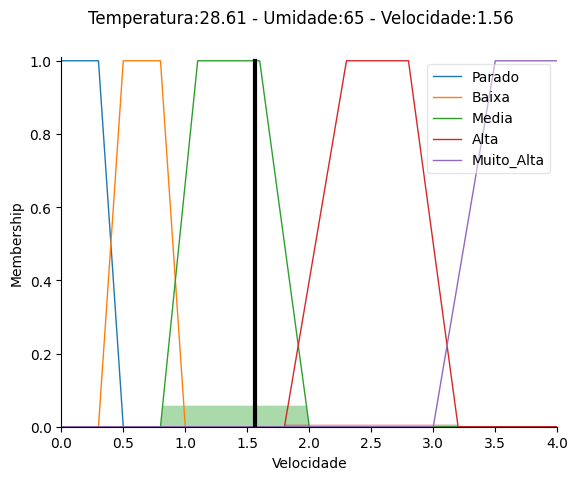

In [20]:
latitude, longitude = obtem_localidade()
ponto_temperatura_atual, ponto_umidade_atual, message_erro = obtem_clima(latitude=latitude, longitude=longitude)
if message_erro ==  None:
    velocidade_estimada = obtem_velocidade(ponto_temperatura_atual, ponto_umidade_atual)
    plot_result(ponto_temperatura_atual, ponto_umidade_atual, velocidade_estimada)
else:
    print(message_erro)